In [50]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [51]:
df=pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv")

In [52]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          242 non-null    int64  
 1   month        242 non-null    int64  
 2   year         242 non-null    int64  
 3   Temperature  242 non-null    int64  
 4   RH           242 non-null    int64  
 5   Ws           242 non-null    int64  
 6   Rain         242 non-null    float64
 7   FFMC         242 non-null    float64
 8   DMC          242 non-null    float64
 9   DC           242 non-null    float64
 10  ISI          242 non-null    float64
 11  BUI          242 non-null    float64
 12  FWI          242 non-null    float64
 13  Classes      242 non-null    object 
 14  Region       242 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.5+ KB


In [54]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


- The Dataset is converted into two sets based on the region 
1. Bejaia Region Dataset 
2. Sidi-Bel Abbes Region Dataset

Add new column with region

In [55]:
df.loc[:121,"Region"]=0
df.loc[123:,"Region"]=1

In [56]:
df=df.dropna().reset_index(drop=True)

In [57]:
df=df.drop(df.index[124]).reset_index(drop=True)

In [58]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [59]:
df['Region']=df['Region'].astype(int)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4    RH          243 non-null    object
 5    Ws          243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 28.6+ KB


In [61]:
df.iloc[120:126]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire,0
121,30,9,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,0
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1
123,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1
124,3,6,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire,1
125,4,6,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire,1


In [62]:
## remove row 122 
df=df.drop(df.index[122]).reset_index(drop=True)

In [63]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [64]:
## fix the spaces from the column name
df.columns=df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

## Change the required columns to int and float data type

In [65]:
df[['day','month','year','Temperature','RH','Ws']]=df[['day','month','year','Temperature','RH','Ws']].astype(int)

In [66]:
to_change=[feature for feature in df.columns if df[feature].dtype=='O']

In [67]:
for i in to_change:
    if i!='Classes':
        df[i]=df[i].astype(float)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          242 non-null    int64  
 1   month        242 non-null    int64  
 2   year         242 non-null    int64  
 3   Temperature  242 non-null    int64  
 4   RH           242 non-null    int64  
 5   Ws           242 non-null    int64  
 6   Rain         242 non-null    float64
 7   FFMC         242 non-null    float64
 8   DMC          242 non-null    float64
 9   DC           242 non-null    float64
 10  ISI          242 non-null    float64
 11  BUI          242 non-null    float64
 12  FWI          242 non-null    float64
 13  Classes      242 non-null    object 
 14  Region       242 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.5+ KB


In [69]:
## removing unwanted spaces from the values
df['Classes']=df['Classes'].str.strip()

In [70]:
df['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [71]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,242.000000,242.000000,242.0,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,15.818182,7.508264,2012.0,32.161157,61.995868,15.504132,0.749587,77.933884,14.730165,49.602893,4.759504,16.747521,7.063636,0.495868
std,8.816243,1.112888,0.0,3.632903,14.842045,2.812609,1.996454,14.308173,12.394623,47.688744,4.154248,14.230095,7.442923,0.501019
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.250000,14.000000,0.000000,72.375000,5.800000,14.325000,1.400000,6.025000,0.725000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.250000,3.500000,12.450000,4.450000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.750000,17.000000,0.500000,88.300000,20.850000,70.050000,7.275000,22.775000,11.525000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [72]:
df.to_csv("AFF_cleaned for machine learning.csv",index=False)

# Exploratory Data Analysis

In [73]:
## drop Day,month and year
df_copy=df.drop(['day','month','year'],axis=1)

In [74]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [75]:
## Encoding the categories in  Classes
df_copy['Classes']=np.where(df_copy['Classes'].str.contains('not fire'),0,1)

In [76]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [79]:
df_copy['Classes'].value_counts()

1    137
0    105
Name: Classes, dtype: int64

/tmp/ipykernel_849/667533294.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


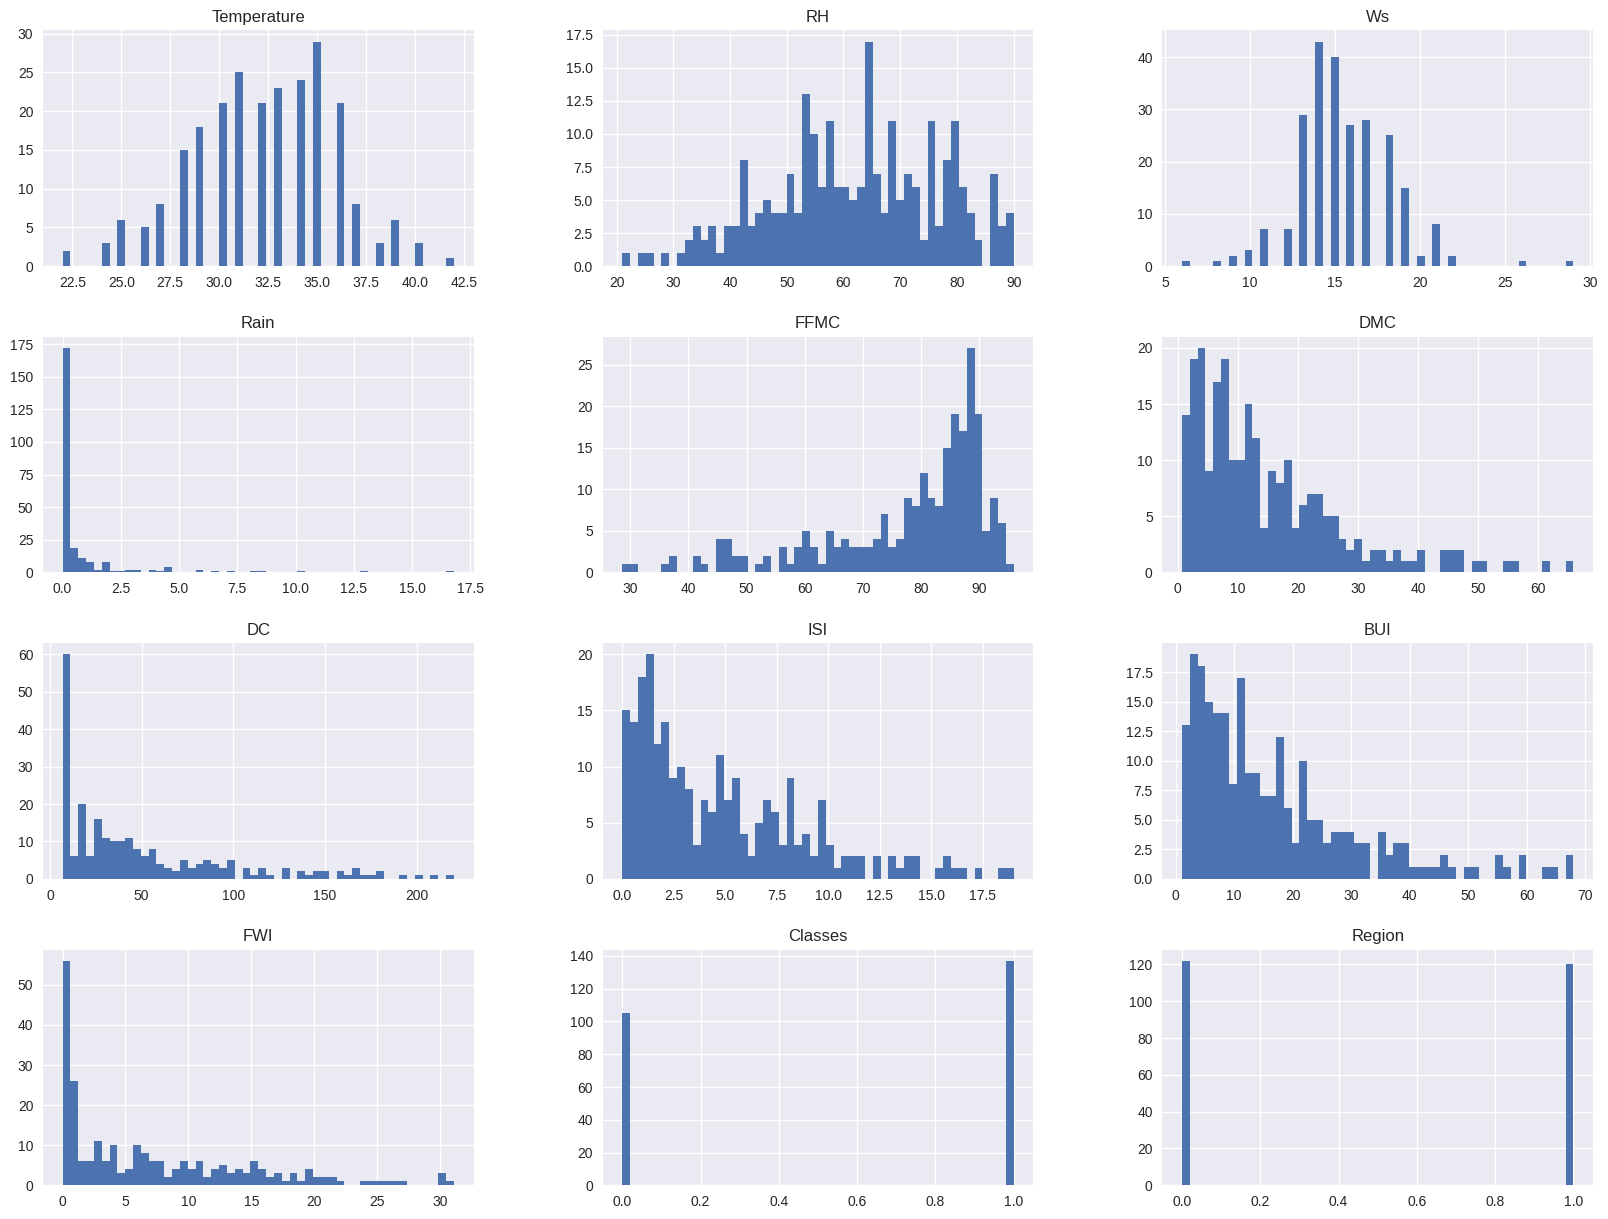

In [82]:
## plot density plot for all feature
plt.style.use('seaborn')
df_copy.hist(bins=50,figsize=(20,15))
plt.show()

In [83]:
## percentage for pie chart
percentage=df['Classes'].value_counts(normalize=True)*100

In [84]:
percentage

fire        56.61157
not fire    43.38843
Name: Classes, dtype: float64

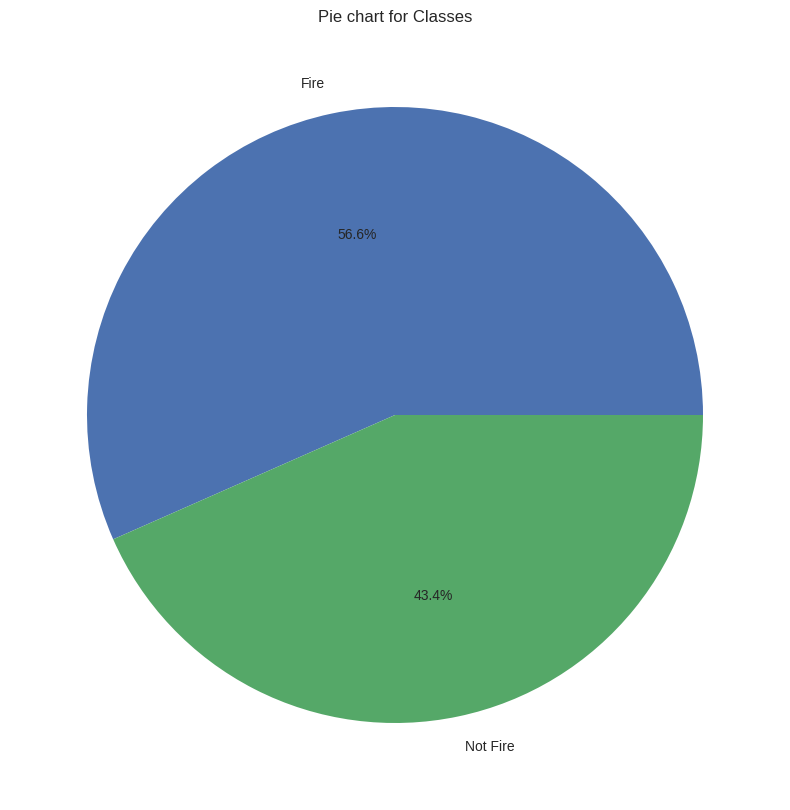

In [90]:
plt.figure(figsize=(10,10))
plt.pie(percentage,labels=['Fire','Not Fire'],autopct='%1.1f%%')
plt.title("Pie chart for Classes")
plt.show()

#### correlation

In [92]:
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.650794,-0.287372,-0.324513,0.676612,0.484601,0.375001,0.603101,0.458633,0.565813,0.514975,0.272790
RH,-0.650794,1.000000,0.247453,0.218836,-0.644058,-0.406805,-0.224874,-0.685801,-0.351953,-0.579812,-0.430319,-0.407064
Ws,-0.287372,0.247453,1.000000,0.178715,-0.173368,-0.004294,0.076165,0.004880,0.027971,0.029085,-0.074460,-0.178133
Rain,-0.324513,0.218836,0.178715,1.000000,-0.539144,-0.284385,-0.294229,-0.343368,-0.295532,-0.320562,-0.374521,-0.047085
FFMC,0.676612,-0.644058,-0.173368,-0.539144,1.000000,0.601559,0.505102,0.738799,0.589872,0.689869,0.768076,0.230275
DMC,0.484601,-0.406805,-0.004294,-0.284385,0.601559,1.000000,0.875504,0.679172,0.982179,0.875409,0.583798,0.196900
DC,0.375001,-0.224874,0.076165,-0.294229,0.505102,0.875504,1.000000,0.506877,0.941802,0.738654,0.509178,-0.075379
ISI,0.603101,-0.685801,0.004880,-0.343368,0.738799,0.679172,0.506877,1.000000,0.642661,0.922613,0.733978,0.268456
BUI,0.458633,-0.351953,0.027971,-0.295532,0.589872,0.982179,0.941802,0.642661,1.000000,0.857451,0.584778,0.093816
FWI,0.565813,-0.579812,0.029085,-0.320562,0.689869,0.875409,0.738654,0.922613,0.857451,1.000000,0.718067,0.201695


<AxesSubplot: >

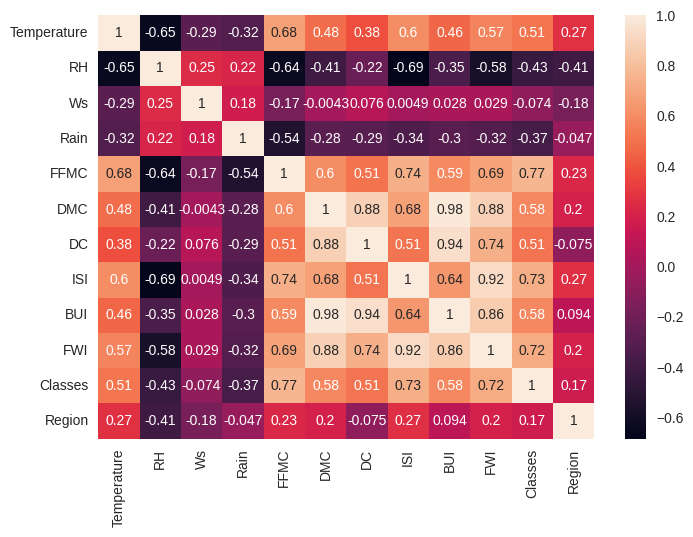

In [96]:
sns.heatmap(df_copy.corr(),annot=True)

<AxesSubplot: >

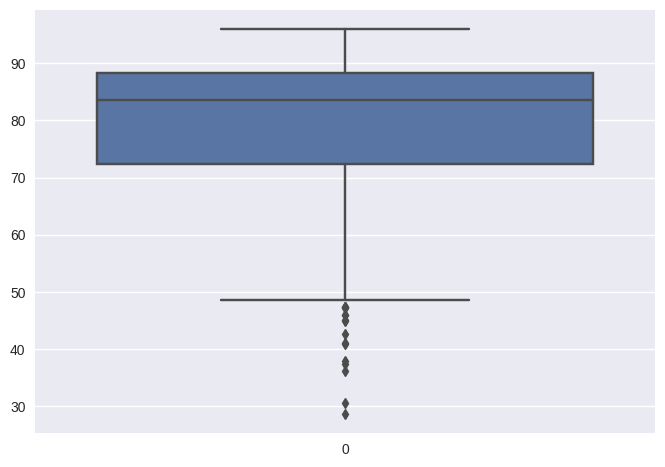

In [97]:
sns.boxplot(df['FFMC'])

Text(0.5, 1.0, 'Fire analysis of Sidi-Bel Abbes Region ')

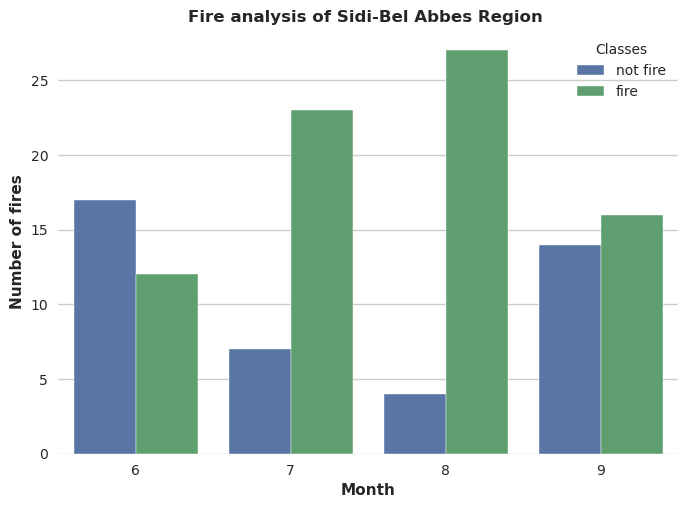

In [104]:
## Monthly fire analysis
dftemp=df.loc[df['Region']==1]
#plt.subplots(figsize(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=dftemp)
plt.ylabel('Number of fires',weight='bold')
plt.xlabel('Month',weight='bold')
plt.title('Fire analysis of Sidi-Bel Abbes Region ',weight='bold')


Text(0.5, 1.0, 'Fire analysis of Bejaia Region')

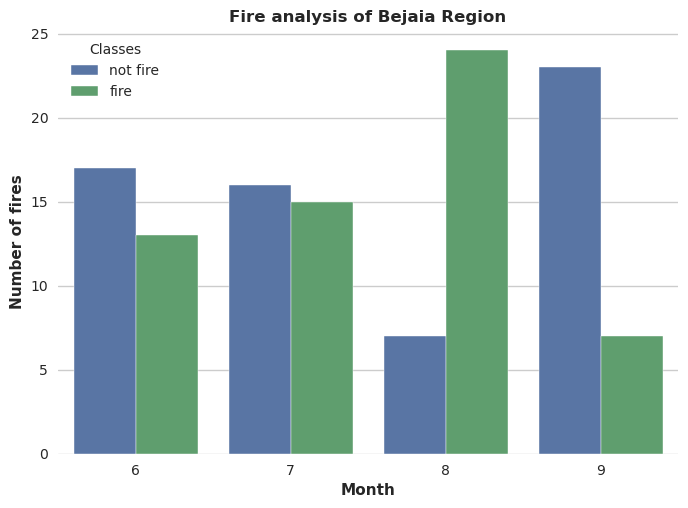

In [103]:
dftemp=df.loc[df['Region']==0]
#plt.subplots(figsize(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=dftemp)
plt.ylabel('Number of fires',weight='bold')
plt.xlabel('Month',weight='bold')
plt.title('Fire analysis of Bejaia Region',weight='bold')


- It is observed that August and Saptember month had most Number of fire in the both region
- Most Number of fires are in month of August then July ans then June.
- Number of fires are less in month of september